In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import os
import datetime

device = torch.device("cuda:0")

path = "./车辆分类数据集/bus/bus001.jpg"
train_features = torch.Tensor(np.array(Image.open(path).resize((100,100),Image.ANTIALIAS))/255).view(1, 100, 100, 3)
test_features = torch.Tensor(np.array(Image.open(path).resize((100,100),Image.ANTIALIAS))/255).view(1, 100, 100, 3)

# 处理客车数据，总共218张，前153张为训练集，后65张为测试集
pic_num = 0
for filename in os.listdir("./车辆分类数据集/bus/"): 
    pic_num = pic_num + 1
    path = "./车辆分类数据集/bus/"+ filename
    img = torch.Tensor(np.array(Image.open(path).resize((100,100),Image.ANTIALIAS))/255).view(1, 100, 100, 3)
    if pic_num <= 153:
        train_features = torch.cat((train_features,img), dim=0)
    else:
        test_features = torch.cat((test_features,img), dim=0)

# 处理汽车数据，总共779张，前545张为训练集，后234张为测试集
pic_num = 0
for filename in os.listdir("./车辆分类数据集/car/"): 
    pic_num = pic_num + 1
    path = "./车辆分类数据集/car/"+ filename
    img = torch.Tensor(np.array(Image.open(path).resize((100,100),Image.ANTIALIAS))/255).view(1, 100, 100, 3)
    if pic_num <= 545:
        train_features = torch.cat((train_features,img), dim=0)
    else:
        test_features = torch.cat((test_features,img), dim=0)

# 处理货车数据，总共360张，前252张为训练集，后108张为测试集
pic_num = 0
for filename in os.listdir("./车辆分类数据集/truck/"): 
    pic_num = pic_num + 1
    path = "./车辆分类数据集/truck/"+ filename
    img = torch.Tensor(np.array(Image.open(path).resize((100,100),Image.ANTIALIAS))/255).view(1, 100, 100, 3)
    if pic_num <= 252:
        train_features = torch.cat((train_features,img), dim=0)
    else:
        test_features = torch.cat((test_features,img), dim=0)

train_features = train_features.permute(0,3,2,1)
test_features = test_features.permute(0,3,2,1)
print(train_features.shape)
print(test_features.shape)

# =================== 训练集标签 =================== #
train_labels = torch.zeros(154).long()
train_labels = torch.cat((train_labels,torch.ones(545).long()), dim=0)
train_labels = torch.cat((train_labels,torch.ones(252).long()+1), dim=0)
print(train_labels.shape)

# =================== 测试集标签 =================== #
test_labels = torch.zeros(66).long()
test_labels = torch.cat((test_labels,torch.ones(234).long()), dim=0)
test_labels = torch.cat((test_labels,torch.ones(108).long()+1), dim=0)
print(test_labels.shape)

torch.Size([951, 3, 100, 100])
torch.Size([408, 3, 100, 100])
torch.Size([951])
torch.Size([408])


In [2]:
# ========================= 定义模型 ========================= #

# ==================== 卷积核大小为3 ==================== #
class ConvModule_3 (torch.nn.Module):
    def __init__(self):
        super(ConvModule_3, self).__init__()
        #定义一个一层卷积
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True)           
        )
        self.fc = nn.Linear(32, num_classes) #[32,3] ,32是卷积输出的通道数，out_channels是多少这里就是多少
 
    def forward(self, X):
        #X = X.requires_grad_()
        out = self.conv(X)
        #print(out.shape)  #torch.Size([32, 32, 98, 98])
        out = nn.functional.avg_pool2d(out, 98)
        #print(out.shape) #torch.Size([32, 32, 1, 1])
        out = out.squeeze()
        #print(out.shape) #torch.Size([32, 32])
        out = self.fc(out)
        return out
    
# ==================== 卷积核大小为5 ==================== #
class ConvModule_5 (torch.nn.Module):
    def __init__(self):
        super(ConvModule_5, self).__init__()
        #定义一个一层卷积
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True)           
        )
        self.fc = nn.Linear(32, num_classes) #[32,3] ,32是卷积输出的通道数，out_channels是多少这里就是多少
 
    def forward(self, X):
        #X = X.requires_grad_()
        out = self.conv(X)
        #print(out.shape)  #torch.Size([32, 32, 96, 96])
        out = nn.functional.avg_pool2d(out, 96)
        #print(out.shape) #torch.Size([32, 32, 1, 1])
        out = out.squeeze()
        #print(out.shape) #torch.Size([32, 32])
        out = self.fc(out)
        return out
    
# ==================== 卷积核大小为7 ==================== #
class ConvModule_7 (torch.nn.Module):
    def __init__(self):
        super(ConvModule_7, self).__init__()
        #定义一个一层卷积
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=7, stride=1, padding=0),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True)           
        )
        self.fc = nn.Linear(32, num_classes) #[32,3] ,32是卷积输出的通道数，out_channels是多少这里就是多少
 
    def forward(self, X):
        #X = X.requires_grad_()
        out = self.conv(X)
        #print(out.shape)  #torch.Size([32, 32, 94, 94])
        out = nn.functional.avg_pool2d(out, 94)
        #print(out.shape) #torch.Size([32, 32, 1, 1])
        out = out.squeeze()
        #print(out.shape) #torch.Size([32, 32])
        out = self.fc(out)
        return out

In [3]:
#训练函数
def train_epoch(net, data_loader, device):
    
    net.train()
    train_batch_num = len(data_loader)
    total_loss = 0
    correct = 0
    sample_num = 0
    
    for batch_idx, (data, target) in enumerate(data_loader):
        data = data.to(device).float()
        target = target.to(device).long()
        optimizer.zero_grad()
        output = net(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        prediction = torch.argmax(output, 1)
        correct += (prediction == target).sum().item()
        sample_num += len(prediction)
    
    loss = total_loss / train_batch_num
    acc = correct / sample_num
    return loss, acc

#测试函数
def test_epoch(net, data_loader, device):
    
    net.eval()
    test_batch_num = len(data_loader)
    total_loss = 0
    correct = 0
    sample_num = 0
    
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(data_loader):
            data = data.to(device).float()
            target = target.to(device).long()
            output = net(data)
            loss = criterion(output, target)
            total_loss += loss.item()
            prediction = torch.argmax(output, 1)
            correct += (prediction == target).sum().item()
            sample_num += len(prediction)
    
    loss = total_loss / test_batch_num
    acc = correct / sample_num
    return loss, acc

num_classes = 3
num_epoch = 100
lr = 0.001
batch_size = 128

#划分数据集
train_dataset = torch.utils.data.TensorDataset(train_features,train_labels)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True, num_workers=0)
test_dataset = torch.utils.data.TensorDataset(test_features,test_labels)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size, shuffle=True, num_workers=0)

In [4]:
# ==================== 卷积核大小为3x3 ==================== #

net = ConvModule_3().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

train_loss_3 = []
train_acc_3 = []
test_loss_3 = []
test_acc_3 = []

start1 = datetime.datetime.now()
for epoch in range(num_epoch):
    
    train_loss, train_acc = train_epoch(net, train_iter, device)
    test_loss, test_acc = test_epoch(net, test_iter, device)
    
    train_loss_3.append(train_loss)
    train_acc_3.append(train_acc)
    test_loss_3.append(test_loss)
    test_acc_3.append(test_acc)
    
    print('epoch %d, train_loss %f, test_loss %f, train_acc %f, test_acc %f' % 
          (epoch+1, train_loss, test_loss, train_acc, test_acc))
end1 = datetime.datetime.now()
print("卷积核大小为3x3执行时间：")
print(end1 - start1)

epoch 1, train_loss 1.177962, test_loss 1.168611, train_acc 0.274448, test_acc 0.247549
epoch 2, train_loss 1.084610, test_loss 1.127602, train_acc 0.347003, test_acc 0.237745
epoch 3, train_loss 1.012125, test_loss 1.076063, train_acc 0.573081, test_acc 0.607843
epoch 4, train_loss 0.953950, test_loss 1.013834, train_acc 0.643533, test_acc 0.625000
epoch 5, train_loss 0.907816, test_loss 0.945246, train_acc 0.630915, test_acc 0.575980
epoch 6, train_loss 0.874149, test_loss 0.923978, train_acc 0.616193, test_acc 0.573529
epoch 7, train_loss 0.858507, test_loss 0.905116, train_acc 0.615142, test_acc 0.580882
epoch 8, train_loss 0.838966, test_loss 0.867850, train_acc 0.607781, test_acc 0.595588
epoch 9, train_loss 0.833626, test_loss 0.866782, train_acc 0.614090, test_acc 0.625000
epoch 10, train_loss 0.823365, test_loss 0.853259, train_acc 0.622503, test_acc 0.629902
epoch 11, train_loss 0.817124, test_loss 0.820181, train_acc 0.627760, test_acc 0.612745
epoch 12, train_loss 0.805740,

In [6]:
# ==================== 卷积核大小为5x5 ==================== #

net = ConvModule_5().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

train_loss_5 = []
train_acc_5 = []
test_loss_5 = []
test_acc_5 = []

start2 = datetime.datetime.now()
for epoch in range(num_epoch):
    
    train_loss, train_acc = train_epoch(net, train_iter, device)
    test_loss, test_acc = test_epoch(net, test_iter, device)
    
    train_loss_5.append(train_loss)
    train_acc_5.append(train_acc)
    test_loss_5.append(test_loss)
    test_acc_5.append(test_acc)
    
    print('epoch %d, train_loss %f, test_loss %f, train_acc %f, test_acc %f' % 
          (epoch+1, train_loss, test_loss, train_acc, test_acc))
end2 = datetime.datetime.now()
print("卷积核大小为5x5执行时间：")
print(end2 - start2)

epoch 1, train_loss 1.021292, test_loss 1.061957, train_acc 0.535226, test_acc 0.575980
epoch 2, train_loss 0.948627, test_loss 1.051551, train_acc 0.573081, test_acc 0.522059
epoch 3, train_loss 0.902218, test_loss 0.989516, train_acc 0.590957, test_acc 0.573529
epoch 4, train_loss 0.872092, test_loss 0.923558, train_acc 0.594111, test_acc 0.571078
epoch 5, train_loss 0.854222, test_loss 0.850469, train_acc 0.613039, test_acc 0.568627
epoch 6, train_loss 0.841548, test_loss 0.885281, train_acc 0.609884, test_acc 0.568627
epoch 7, train_loss 0.834551, test_loss 0.836642, train_acc 0.621451, test_acc 0.656863
epoch 8, train_loss 0.816758, test_loss 0.842118, train_acc 0.645636, test_acc 0.674020
epoch 9, train_loss 0.806755, test_loss 0.830015, train_acc 0.646688, test_acc 0.595588
epoch 10, train_loss 0.807557, test_loss 0.759611, train_acc 0.651945, test_acc 0.698529
epoch 11, train_loss 0.798640, test_loss 0.779300, train_acc 0.658254, test_acc 0.698529
epoch 12, train_loss 0.785851,

In [7]:
# ==================== 卷积核大小为7x7 ==================== #

net = ConvModule_7().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

train_loss_7 = []
train_acc_7 = []
test_loss_7 = []
test_acc_7 = []

start3 = datetime.datetime.now()
for epoch in range(num_epoch):
    
    train_loss, train_acc = train_epoch(net, train_iter, device)
    test_loss, test_acc = test_epoch(net, test_iter, device)
    
    train_loss_7.append(train_loss)
    train_acc_7.append(train_acc)
    test_loss_7.append(test_loss)
    test_acc_7.append(test_acc)
    
    print('epoch %d, train_loss %f, test_loss %f, train_acc %f, test_acc %f' % 
          (epoch+1, train_loss, test_loss, train_acc, test_acc))
end3 = datetime.datetime.now()
print("卷积核大小为7x7执行时间：")
print(end3 - start3)

epoch 1, train_loss 1.079669, test_loss 1.049932, train_acc 0.366982, test_acc 0.436275
epoch 2, train_loss 0.967575, test_loss 0.994617, train_acc 0.569926, test_acc 0.605392
epoch 3, train_loss 0.906757, test_loss 0.963129, train_acc 0.624606, test_acc 0.698529
epoch 4, train_loss 0.861840, test_loss 0.955663, train_acc 0.667718, test_acc 0.654412
epoch 5, train_loss 0.838955, test_loss 0.874937, train_acc 0.683491, test_acc 0.693627
epoch 6, train_loss 0.814937, test_loss 0.826263, train_acc 0.690852, test_acc 0.674020
epoch 7, train_loss 0.816019, test_loss 0.810411, train_acc 0.664564, test_acc 0.661765
epoch 8, train_loss 0.796577, test_loss 0.788504, train_acc 0.677182, test_acc 0.708333
epoch 9, train_loss 0.791539, test_loss 0.797595, train_acc 0.695058, test_acc 0.710784
epoch 10, train_loss 0.785319, test_loss 0.789670, train_acc 0.697161, test_acc 0.676471
epoch 11, train_loss 0.782942, test_loss 0.753750, train_acc 0.687697, test_acc 0.676471
epoch 12, train_loss 0.767373,

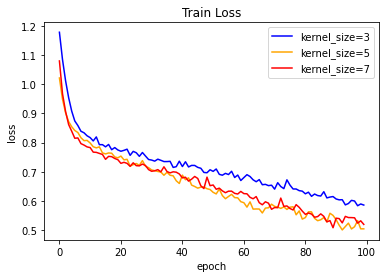

In [8]:
plt.plot(train_loss_3,label='kernel_size=3',color='blue')
plt.plot(train_loss_5,label='kernel_size=5', color='orange')
plt.plot(train_loss_7,label='kernel_size=7', color='red')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Train Loss")
plt.legend()
plt.show()

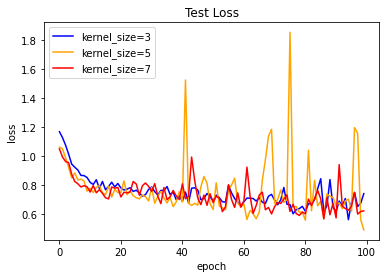

In [9]:
plt.plot(test_loss_3,label='kernel_size=3',color='blue')
plt.plot(test_loss_5,label='kernel_size=5', color='orange')
plt.plot(test_loss_7,label='kernel_size=7', color='red')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Test Loss")
plt.legend()
plt.show()

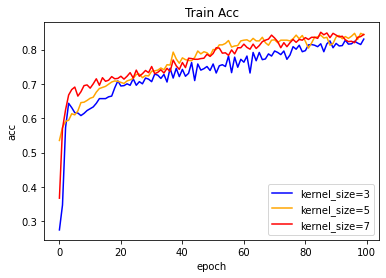

In [10]:
plt.plot(train_acc_3,label='kernel_size=3',color='blue')
plt.plot(train_acc_5,label='kernel_size=5', color='orange')
plt.plot(train_acc_7,label='kernel_size=7', color='red')
plt.ylabel("acc")
plt.xlabel("epoch")
plt.title("Train Acc")
plt.legend()
plt.show()

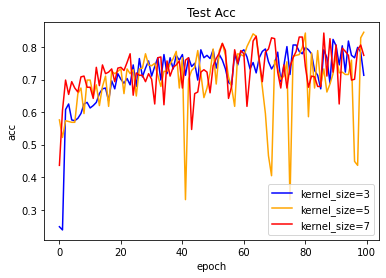

In [11]:
plt.plot(test_acc_3,label='kernel_size=3',color='blue')
plt.plot(test_acc_5,label='kernel_size=5', color='orange')
plt.plot(test_acc_7,label='kernel_size=7', color='red')
plt.ylabel("acc")
plt.xlabel("epoch")
plt.title("Test Acc")
plt.legend()
plt.show()